In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Code from TA, see Zulip

# DON'T NEED
#def process_chunk(chunk):
#        print(f'Processing chunk with {len(chunk)} rows')
#        print(chunk.columns)

#df_reader = pd.read_json('natural_disaster_quotes.json.bz2', lines=True, compression='bz2', chunksize=1000000)
#for chunk in df_reader:
#    process_chunk(chunk)

In [3]:
# Import quotation data

df_quotes = pd.read_json('natural_disaster_quotes.json.bz2', lines=True, compression='bz2')
print(f"Number of quotes: %d" % len(df_quotes.index))

Number of quotes: 153222


In [4]:
df_quotes.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2020-02-12-097370,They are still working on the WHIP + (Wildfire...,None,[],2020-02-12 18:56:50,1,"[[None, 0.8057], [Ben Sasse, 0.1049], [Deb Fis...",[https://kticradio.com/agricultural/nebraska-s...,E
1,2020-02-06-111237,We are extremely delighted to be associated wi...,None,[],2020-02-06 21:01:00,1,"[[None, 0.8583], [Johnnie Walker, 0.0898], [Gr...",[https://www.businessdailyafrica.com/lifestyle...,E
2,2020-04-11-001156,All we're asking is for the mayor to assure us...,None,[],2020-04-11 04:19:36,1,"[[None, 0.9233], [Governor Eric Holcomb, 0.0767]]",[http://wave3.com/2020/04/10/police-record-lic...,E
3,2020-02-13-047936,"In eight months as Secretary of State, Julian ...",Leo Varadkar,[Q1728820],2020-02-13 21:43:13,3,"[[Leo Varadkar, 0.8722], [None, 0.1096], [Arle...",[https://inews.co.uk/news/politics/cabinet-res...,E
4,2020-02-12-067253,Now with Storm Ciara winds were a little stron...,Dennis the Menace,[Q201608],2020-02-12 08:28:00,1,"[[Dennis the Menace, 0.4044], [None, 0.3629], ...",[http://express.co.uk/news/weather/1241128/sto...,E


In [5]:
pd.options.display.max_colwidth = 200
df_quotes.head().quotation
# Lots of irrelevant quotes! -> DISCUSS

0                                                                                                            They are still working on the WHIP + (Wildfire, Hurricane, and Indemnity Program Plus) funding,
1    We are extremely delighted to be associated with both Greg Snow and Dismas Indiza. Their continued professionalism and excellence on the course speak to their continued determination to be the bes...
2    All we're asking is for the mayor to assure us that we are permitted, that On Fire Christian Church, is permitted to hold its lawful drive-in church service on Easter Sunday as it has done for man...
3    In eight months as Secretary of State, Julian you helped to restore power-sharing in Stormont, secured an agreement with us to avoid a hard border, plus marriage equality. You are one of Britain's...
4                                                                                                                                    Now with Storm Ciara winds were a little strong

In [6]:
print(df_quotes.dtypes)

quoteID                   object
quotation                 object
speaker                   object
qids                      object
date              datetime64[ns]
numOccurrences             int64
probas                    object
urls                      object
phase                     object
dtype: object


Text(0, 0.5, 'Frequency')

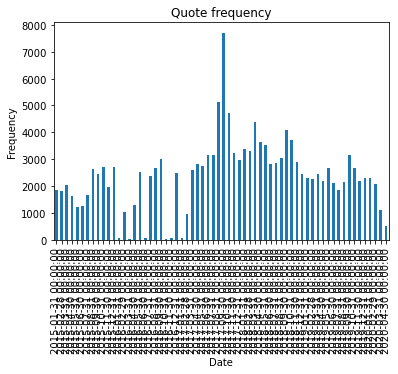

In [20]:
# Frequency histogram of the quotes w.r.t. dates
# add column with ones to groupby and count number of quotes in a month (for example)
df_quotes['count'] = 1

df_tmp = df_quotes.groupby(pd.Grouper(key='date', axis=0, freq='M')).sum()
# TODO: make pretty :)
df_tmp['count'].plot(kind='bar')
plt.title("Quote frequency")
plt.xlabel("Date")
plt.ylabel("Frequency")

In [8]:
# Import additional data

# Dataset: download at https://www.kaggle.com/headsortails/us-natural-disaster-declarations
# nd = natural disaters
nd_frame = pd.read_csv('data/us_disaster_declarations.csv')
print(nd_frame.dtypes)

fema_declaration_string       object
disaster_number                int64
state                         object
declaration_type              object
declaration_date              object
fy_declared                    int64
incident_type                 object
declaration_title             object
ih_program_declared            int64
ia_program_declared            int64
pa_program_declared            int64
hm_program_declared            int64
incident_begin_date           object
incident_end_date             object
disaster_closeout_date        object
fips                           int64
place_code                     int64
designated_area               object
declaration_request_number     int64
hash                          object
last_refresh                  object
id                            object
dtype: object


Text(0, 0.5, 'Frequency')

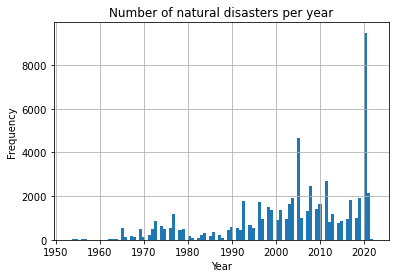

In [9]:
# Natural disasters per year
nd_frame['fy_declared'].hist(bins=100)
plt.title("Number of natural disasters per year")
plt.xlabel("Year")
plt.ylabel("Frequency")

# 2020 because of Covid-19 ? -> TODO: remove rows after April 2020 (don't have quotes for it) 
# Remove "Biological" disasters ????

In [10]:
# get data rows from 2015 to 2020 and drop irrelevant rows
nd_frame.drop(nd_frame[nd_frame['fy_declared'] < 2015].index, inplace = True)
nd_frame.drop(nd_frame[nd_frame['fy_declared'] > 2020].index, inplace = True)

nd_frame.drop(nd_frame[nd_frame.incident_type == "Other"].index, inplace = True)
print(nd_frame.head().iloc[:, :7])

      fema_declaration_string  disaster_number state declaration_type  \
44317              DR-4197-NM             4197    NM               DR   
44318              DR-4197-NM             4197    NM               DR   
44319              DR-4197-NM             4197    NM               DR   
44320              DR-4197-NM             4197    NM               DR   
44321              DR-4197-NM             4197    NM               DR   

           declaration_date  fy_declared    incident_type  
44317  2014-10-06T19:20:00Z         2015  Severe Storm(s)  
44318  2014-10-06T19:20:00Z         2015  Severe Storm(s)  
44319  2014-10-06T19:20:00Z         2015  Severe Storm(s)  
44320  2014-10-06T19:20:00Z         2015  Severe Storm(s)  
44321  2014-10-06T19:20:00Z         2015  Severe Storm(s)  


In [11]:
# Not all are "natural" disasters
nd_types = nd_frame.incident_type.unique()
print(nd_types)

['Severe Storm(s)' 'Fire' 'Volcano' 'Flood' 'Snow' 'Tornado'
 'Severe Ice Storm' 'Typhoon' 'Coastal Storm' 'Toxic Substances'
 'Hurricane' 'Mud/Landslide' 'Dam/Levee Break' 'Earthquake' 'Biological']


In [12]:
# CAN DO MORE BASIC STATISTICS 
print(f"Number of natural disasters from 2015 to 2020: %d" % len(nd_frame.index))

Number of natural disasters from 2015 to 2020: 16068


In [13]:
#TODO: Data handling and analysis -> ADD SOME EXPLANATIONS FOR GRAPHS
#print(nd_frame['incident_type'].value_counts())

<AxesSubplot:title={'center':'Occurence of disasters'}>

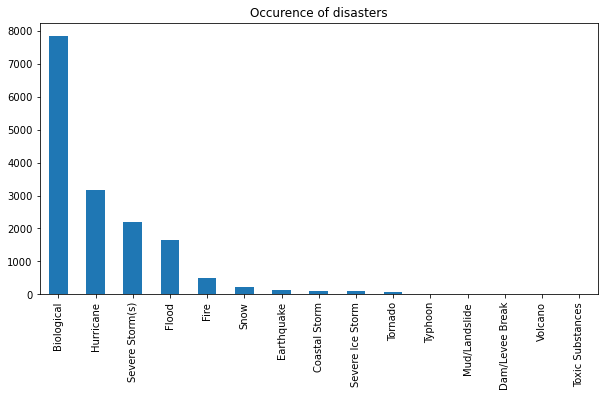

In [14]:
# Occurence of different disasters
nd_frame['incident_type'].value_counts().plot(kind='bar', figsize=(10, 5), title="Occurence of disasters")

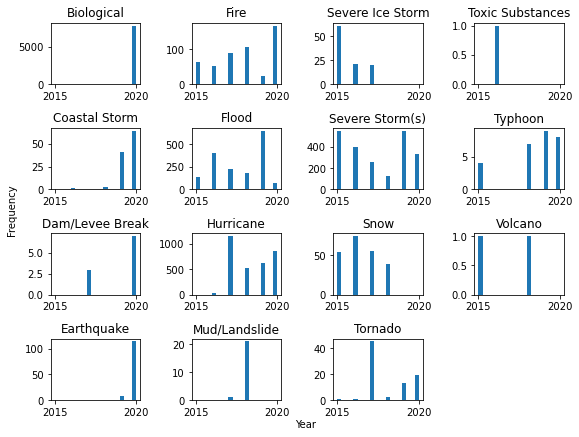

In [15]:
# "Ground truth" plots

stats_by_type = nd_frame.groupby('incident_type').apply(lambda x: pd.Series({
        'fy_declared': x['fy_declared'].values
    }))

fig, ax = plt.subplots(4, 4, figsize=(8,6), sharey=False, sharex=False)

for i in range(15):
    sbplt = ax[i%4, math.floor(i/4)]
    sbplt.hist(stats_by_type.iloc[i].values, range=[2015,2020], bins = 20)
    sbplt.set_title(stats_by_type.index[i])
    
fig.tight_layout()

fig.text(0.5,0, "Year")
fig.text(0,0.45, "Frequency", rotation = 90)
fig.delaxes(ax[3][3])

# !!!!!! y-axis not the same (intended)
# CHECK WEIRD VALUES (EARTHQUAKES.....)

In [16]:
# Separate quotes in different dataframes with respect to the type of disaster

#['Severe Storm(s)', 'Fire', 'Volcano', 'Flood', 'Tornado',
# 'Severe Ice Storm', 'Typhoon', 'Coastal Storm' ,
# 'Hurricane', 'Landslide', 'Dam/Levee Break', 'Earthquake']

# DON'T FORGET LOWERCASE (+ add relevant words for the different dataframes for completness -> when dataset is finalized)
# DISCUSS THAT SOME INCIDENT ARE REFERENCED BY THEIR NAMES SO NOT ALL RELEVANT QUOTES CAN BE EXTRACTED
df_hurricane = df_quotes[df_quotes['quotation'].str.contains('Hurricane')]
df_typhoon = df_quotes[df_quotes['quotation'].str.contains('Typhoon')]
df_tornado = df_quotes[df_quotes['quotation'].str.contains('Tornado')]
df_flood = df_quotes[df_quotes['quotation'].str.contains('Flood')]
# can be more precise, need to explore further
df_storm = df_quotes[df_quotes['quotation'].str.contains('Storm')]
df_volcano = df_quotes[df_quotes['quotation'].str.contains('Volcano')]
# !!! Fire pretty general term -> discuss that there are a lot of irrelevant quotes
df_fire = df_quotes[df_quotes['quotation'].str.contains('Fire')]
df_landslide = df_quotes[df_quotes['quotation'].str.contains('Landslide')]
df_earthquake = df_quotes[df_quotes['quotation'].str.contains('Earthquake')]

df_dam = df_quotes[df_quotes['quotation'].str.contains('Dam')]

In [17]:
df_hurricane.head().quotation

0                                                                                                             They are still working on the WHIP + (Wildfire, Hurricane, and Indemnity Program Plus) funding,
5     They have filed charges trying to prosecute a company and its employees for the Act of God that was Hurricane Harvey. This is a political prosecution in search of a theory, and Harris County taxpa...
33                                                                            Hurricane Sandy when there was no electricity, that was probably the last time where we had to close down for a couple of days,
45    We're about 25 minutes southeast of San Juan. We reopened five months after Hurricane Maria. When our first guests arrived at the property after it reopened, they said it wasn't the same hotel tha...
57                                                                                    We are confident James will be able to get back on the field for the Hurricanes in the lat

In [18]:
# Basic statistics per incident type
print(f"Number of quotes for Hurricanes: %d" % len(df_hurricane.index))
print(f"Number of quotes for Typhoons: %d" % len(df_typhoon.index))
print(f"Number of quotes for Tornados: %d" % len(df_tornado.index))
print(f"Number of quotes for Floods: %d" % len(df_flood.index))
print(f"Number of quotes for Storms: %d" % len(df_storm.index))
print(f"Number of quotes for Volcanos: %d" % len(df_volcano.index))
print(f"Number of quotes for Fires: %d" % len(df_fire.index))
print(f"Number of quotes for Landslides: %d" % len(df_landslide.index))
print(f"Number of quotes for Earthquakes: %d" % len(df_earthquake.index))
print(f"Number of quotes for Dam breaks: %d" % len(df_dam.index))

Number of quotes for Hurricanes: 26657
Number of quotes for Typhoons: 1403
Number of quotes for Tornados: 1258
Number of quotes for Floods: 5748
Number of quotes for Storms: 23229
Number of quotes for Volcanos: 878
Number of quotes for Fires: 57801
Number of quotes for Landslides: 314
Number of quotes for Earthquakes: 1416
Number of quotes for Dam breaks: 338


Text(0, 0.5, 'Frequency')

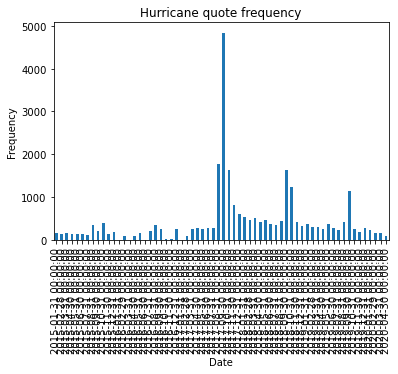

In [22]:
# Plots w.r.t. dates

# 'M' means MONTHS, can group by other value
df_hurr = df_hurricane.groupby(pd.Grouper(key='date', axis=0, freq='M')).sum()
df_hurr['count'].plot(kind='bar')
plt.title("Hurricane quote frequency")
plt.xlabel("Date")
plt.ylabel("Frequency")
# Need to see correlation with ground truth

# TODO: other plots for incident types + make pretty (maybe not bar plot), BUT NEED UPGRADED QUOTE DATASET ...